Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9213
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1102 - accuracy: 0.9664
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9693
0.09866952151060104
0.9692999720573425
1/1 [==============================] - 0s 84ms/step
The number is probably a : 0


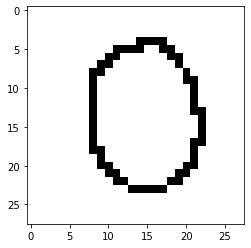

1/1 [==============================] - 0s 17ms/step
The number is probably a : 5


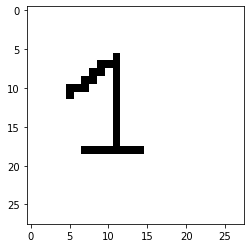

1/1 [==============================] - 0s 19ms/step
The number is probably a : 2


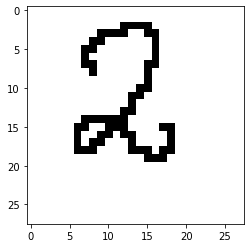

1/1 [==============================] - 0s 17ms/step
The number is probably a : 3


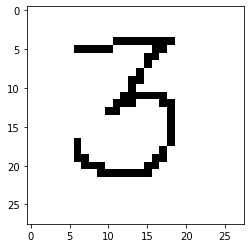

1/1 [==============================] - 0s 17ms/step
The number is probably a : 4


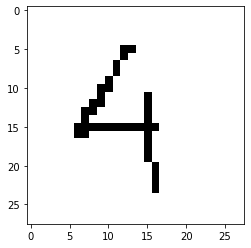

1/1 [==============================] - 0s 16ms/step
The number is probably a : 3


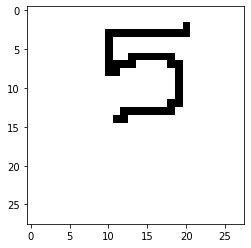

1/1 [==============================] - 0s 18ms/step
The number is probably a : 2


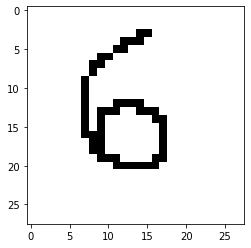

1/1 [==============================] - 0s 20ms/step
The number is probably a : 1


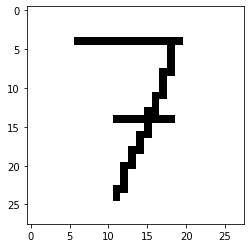

1/1 [==============================] - 0s 26ms/step
The number is probably a : 3


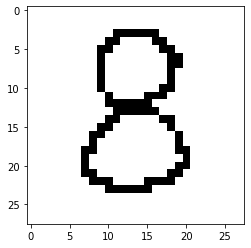

1/1 [==============================] - 0s 18ms/step
The number is probably a : 3


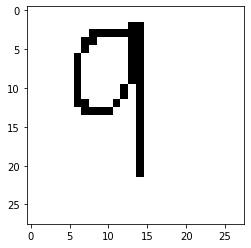

'\n# Load custom images and predict them\nimage_number = 1\nwhile os.path.isfile(\'digits/digit{}.png\'.format(image_number)):\n    try:\n        img = cv2.imread(\'digits/digit{}.png\'.format(image_number))[:,:,0]\n        img = np.invert(np.array([img]))\n        prediction = model.predict(img)\n        print("The number is probably a {}".format(np.argmax(prediction)))\n        plt.imshow(img[0], cmap=plt.cm.binary)\n        plt.show()\n        image_number += 1\n    except:\n        print("Error reading image! Proceeding with next image...")\n        image_number += 1\n\n\n'

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=3)

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print(val_loss)
    print(val_acc)

    # Saving the model
    model.save('handwritten_digits.model')
else:
    # Load the model
    model = tf.keras.models.load_model('handwritten_digits.model')



for x in range (0,10):
      img = cv2.imread(f'{x}.png')[:,:,0]
      img = np.invert(np.array([img]))
      prediction = model.predict(img)
      print(f'The number is probably a : {np.argmax(prediction)}')
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()


